<a href="https://colab.research.google.com/github/estebanbec/machine_learning/blob/main/Colab_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al Dataset - Estudios del corazón de Framingham**

El presente dataset está compuesto por una serie de datos obtenidos del "Estudio del Corazón de Framingham". Este estudio es un análisis prospectivo a largo plazo que investiga la etiología de las enfermedades cardiovasculares en una población de sujetos que viven libremente en la comunidad de Framingham, Massachusetts.


# **Objetivo**

El objetivo del presente proyecto tiene como intención intentar entrenar un modelo de machine learning que permita ejecutar una clasificación en función a datos recopilados previamente.
Se espera que a partir de los datos recopilados procesarse el ingreso de nuevos casos consiguiendo entender la relación entre factores cardíacos de salud (detallados más adelante) que deriven en la muerte.

# **Data Acquisition - Importación de datos**

In [2]:
'''
En este bloque iremos asignando la importación de librerías que se utilicen a lo largo del
proyecto.
'''

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/estebanbec/machine_learning/main/Framingham_dataset.csv"

df_framingham = pd.read_csv(url, sep =";")

# **Data Wrangling - Conociendo el dataset**

La intención de esta etapa del trabajo desarrollaremos la limpieza de los datos elegidos, aplicando las técnicas vistas para el tratamiento de valores duplicados, nulos y outliers con su respectiva fundamentación.

A fin de validar la correcta importación del file, y proceder en conocerlo, podemos ejecutar algunas funciones

In [4]:
df_framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,PREVMI,PREVSTRK,HYPERTEN,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,DEATH
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,0,0,0,0,1,1,1,0,1,0
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,0,0,0,0,1,1,1,0,1,0
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,0,0,0,0,0,0,0,0
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,0,0,0,0,0,0,0,0
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_framingham.tail()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,PREVMI,PREVSTRK,HYPERTEN,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,DEATH
11622,9998212,1,173.0,46,126.0,82.0,0,0.0,19.17,0,...,0,0,1,0,0,0,0,0,0,0
11623,9998212,1,153.0,52,143.0,89.0,0,0.0,25.74,0,...,0,0,1,0,0,0,0,0,0,0
11624,9999312,2,196.0,39,133.0,86.0,1,30.0,20.91,0,...,0,0,1,0,0,0,0,0,0,0
11625,9999312,2,240.0,46,138.0,79.0,1,20.0,26.39,0,...,0,0,1,0,0,0,0,0,0,0
11626,9999312,2,NaN,50,147.0,96.0,1,10.0,24.19,0,...,0,0,1,0,0,0,0,0,0,0


Se detallan a continuación las columnas que componen al file, detallandose en documentación adjunta (presentación) qué información aloja cada una de ellas.

In [6]:
df_framingham.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'EDUC',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'HYPERTEN', 'ANGINA',
       'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'DEATH'],
      dtype='object')

Podemos conocer además la estructura y algunos datos principales del dataset con la función Shape, Info, Describe e identificar además la aparición de valores nulos.

Puede apreciarse que se trata de un dataset compuesto por 11.627 filas y 26 columnas:

In [7]:
df_framingham.shape

(11627, 26)

Y también que la información que contiene es continua (y no categórica):

In [8]:
df_framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   11627 non-null  int64  
 13  EDUC      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  HYPERTEN  11627 non-null  int64  
 19  ANGINA    11627 non-null  int64  
 20  HOSPMI    11627 non-null  in

Aplicaremos a continuación la función Describe para obtener un resumen estadístico del dataframe:

In [9]:
df_framingham.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,PREVMI,PREVSTRK,HYPERTEN,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,DEATH
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,...,0.032167,0.013073,0.743270,0.163585,0.099252,0.153780,0.271609,0.091253,0.249333,0.303346
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,...,0.176450,0.113592,0.436848,0.369914,0.299013,0.360753,0.444809,0.287981,0.432646,0.459723
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Algunas primeras conclusiones:


*   Se aprecia que no todas las columnas/variables tienen información para todos los registros: Por ejemplo, siendo el total de registros de la base de 11.627, puede verse que para la variable "TOTCHOL" solo hay información para 11.218 de ellos (3.51% del total).
*   Esto nos da la pauta de que claramente vamos a tener que trabajar sobre los datos de manera previa a avanzar con el desarrollo del modelo.



Para poder profundizar, por ejemplo, sobre el hallazo de los datos nulos, podemos aplicar la función "isna" al dataframe:

In [10]:
df_framingham.isnull().sum()

RANDID        0
SEX           0
TOTCHOL     409
AGE           0
SYSBP         0
DIABP         0
CURSMOKE      0
CIGPDAY      79
BMI          52
DIABETES      0
BPMEDS      593
HEARTRTE      6
GLUCOSE       0
EDUC        295
PREVCHD       0
PREVAP        0
PREVMI        0
PREVSTRK      0
HYPERTEN      0
ANGINA        0
HOSPMI        0
MI_FCHD       0
ANYCHD        0
STROKE        0
CVD           0
DEATH         0
dtype: int64

Veamos, a priori, cuanto representan los missing values sobre el total de datos:

In [11]:
# Calculo del número de valores nulos por columna
nulos_por_columna = df_framingham.isnull().sum()

# Identificación de aquellos casos con resultados nulos
nulos_no_cero = nulos_por_columna[nulos_por_columna != 0]

# Cantidad total de registros del df para entender el porcentaje que representan
total_registros = len(df_framingham)

# Creación de pequeño dataframe con los resultados
resultados = pd.DataFrame({
    'Variable': nulos_no_cero.index,
    'Cantidad de registros nulos': nulos_no_cero.values,
    '% Nulos sobre total': np.round((nulos_no_cero.values / total_registros) * 100,2)
})

resultados


,Variable,Cantidad de registros nulos,% Nulos sobre total
0,TOTCHOL,409,3.52
1,CIGPDAY,79,0.68
2,BMI,52,0.45
3,BPMEDS,593,5.10
4,HEARTRTE,6,0.05
5,EDUC,295,2.54


Antes de evaluar que acción llevar adelante con estos missing values, vamos a entender qué cantidad de registros implicaría perder ya que puede que un mismo caso tenga valores ausentes para todas las variables, lo que minimizaría la cantidad de registros depurables, o que esta ausencia se de para registros totalmente distintos:

In [12]:
#Podemos armar una función que nos traiga la cantidad de registros que tengan valores nulos
#en la serie de columnas/variables que definamos:

def contar_nulos_comunes(df, columnas):
    """
    Devuelve la cantidad de registros nulos en los que todas las variables especificadas tienen valores nulos.

    :param df: DataFrame sobre el cual se va a operar.
    :param columnas: Lista de nombres de las columnas a verificar.
    :return: Cantidad de registros nulos en los que todas las columnas especificadas tienen valores nulos.
    """
    # Filtrar filas donde todas las columnas especificadas tienen valores nulos
    nulos_comunes = df[columnas].isnull().all(axis=1)

    # Contar el número de esas filas
    cantidad_nulos_comunes = nulos_comunes.sum()

    return cantidad_nulos_comunes

# Lista de columnas a verificar - Aquellas que presentan al menos algún nulo
columnas_verificar = ['TOTCHOL', 'CIGPDAY', 'BMI', 'BPMEDS', 'HEARTRTE',  'EDUC']

# Usar la función con el DataFrame df_framingham
cantidad_nulos_comunes = contar_nulos_comunes(df_framingham, columnas_verificar)

print(f"Cantidad de registros nulos en las variables especificadas: {cantidad_nulos_comunes}")


Cantidad de registros nulos en las variables especificadas: 0


De este ejercicio se desprende entonces que no hay al menos ningún registro que tenga ausente para todas las variables, así que podría llegar a perder un total del 12.34% de los datos. (Puede incluso ser menor ya que se evaluó la condición de nulidad en todas). Esto lo veremos más adelante.

Para el tratamiento de estos valores ausentes es posible aplicar distintas alternativas a evaluar:


*   Desestimar los registros: Teniendo en cuenta las consideraciones mencionadas previamente.

*   Asignarles un valor en función de la media: Tratandosé de un dataset relacionado a información de salud, donde conceptualmente no se considera apropiado extrapolar la situación de algunas personas a otras (visto que cada caso puede ser sumamente particular)

Por lo expuesto, vamos a proceder con la depuración de estos registros a fin de entender el impacto certero sobre el total de los datos.

Aplicamos el método dropna:

In [13]:
df_sin_nulos = df_framingham.dropna()

Consultamos el shape del nuevo dataframe

In [14]:
df_sin_nulos.shape

(10261, 26)

Se observa que descendieron la cantidad de registros partiendo de un total de 11.627 para llegar a 10.261, es decir, una diferencia de 1.366 registros equivalente al 11.74% de la base original.

Podemos a continuación validar si efectivamente el nuevo dataframe quedó sin valores nulos asociados:

In [15]:
df_sin_nulos.isnull().sum()

RANDID      0
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
EDUC        0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
HYPERTEN    0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
DEATH       0
dtype: int64

Para continuar con el análisis del dataset habiendo ya relevado posibles factores que afecten la información provista (como los datos ausentes), avanzaremos con la generación de gráficos.

## Verificación del balance de clases

A fin de corroborar la existencia de balance/desbalance de clases que se presentan en el conjunto de datos bajo análisis, realizaremos algunas verificaciones.

Asegurar que la clase objetivo (DEATH) está representada de manera equilibrada nos permitirá avanzar en un correcto desarrollo del modelo y asegurar que no se presenten desbalances significativos.

Recordemos que para lo abordado, el modelo trabajará sobre un problema de clasificación binaria, siendo la clase objetivo "DEATH", tomando los valores de 0 y 1 para indicar si la persona vive o ha fallecido respectivamente.

Revisión de cantidad de registros nominales para fallecidos - no fallecidos

In [16]:
print(df_sin_nulos['DEATH'].value_counts())

DEATH
0    7178
1    3083
Name: count, dtype: int64


Revisión de cantidad de registros porncentuales para fallecidos y no fallecidos

In [18]:
total_samples = len(df_sin_nulos)
class_counts = df_sin_nulos['DEATH'].value_counts()
class_percentages = class_counts / total_samples * 100
print(class_percentages)

DEATH
0    69.954195
1    30.045805
Name: count, dtype: float64


De la revisión del balance de clases realizado encontramos que la distribución es dispar, siendo que el 30.04% de los pacientes bajo estudio han fallecido y el 69.96% no.

Esta diferencia de proporciones entre las muestras podría no considerarse como un desbalance significativo (como tal vez si lo fuera si hubiera sido 90/10)

No obstante, teniendo en cuenta que los fallecidos son la clase minoritaria que queremos predecir con precisión, es probable que la distribución encontrada pudiera presentar algún inconveniente en el rendimiento del modelo. (Veremos más adelante si surge la necesidad de realizar alguna gestión adicional sobre esto).

Gráfico de ocurrencias de la clase

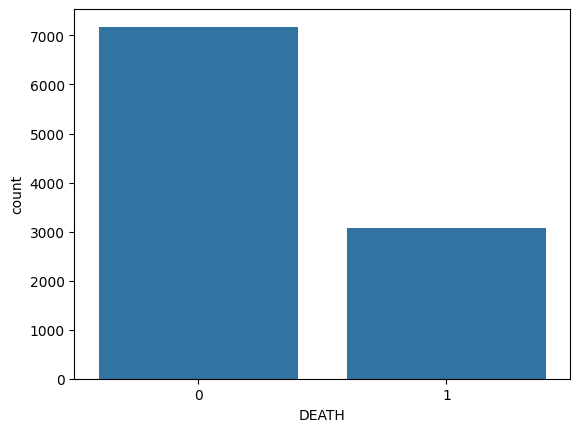

In [17]:
sns.countplot(x='DEATH', data=df_sin_nulos)
plt.show()

##Verificación de valores duplicados

Verificaremos a continuación la existencia, o no, de valores duplicados dentro del dataset.
Sabiendo que el mismo contiene una columna de ID para los pacientes, lo primero que haremos es armar un nuevo dataframe (solo para validar este punto) donde será excluida esa variable ya que:

*   Es probable que por error, bajo distintos ID, hayan sido cargados los mismos datos de un paciente

*   La asignación de distintos ID's para los casos implica que, si no se excluyera esta columna en el presente ejercicio, obviamente no encontraríamos duplicados por tener asociado cada registro un ID único



No obstante, para asegurarnos de cubrir todas las posiblidades primero revisaremos si existen duplicados sobre todo el dataframe tal cual está cargado:

In [33]:
revisa_duplicados = df_sin_nulos.duplicated()
print(revisa_duplicados.sum())

0


Para asegurarnos sobre los comentarios realizados en función de un probable error de carga de iguales datos en distintos ID's (visto que consideramos que es imposible, o casi imposible que dos pacientes tengan resultados exactamente iguales en esta cantidad de variables), excluiremos ahora la variable RANDID y realizaremos la misma prueba.

In [37]:
df_sin_ID = df_sin_nulos.drop('RANDID', axis=1)

In [38]:
duplicados = df_sin_ID[df_sin_ID.duplicated()]
duplicados

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,PREVMI,PREVSTRK,HYPERTEN,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,DEATH


Se corrobora entonces que no existen valores duplicados que requieran algún tipo de tratamiento.